In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [2]:
experiments = []

In [3]:

algorithms = ['RL', 'AC', 'OFFPAC', 'PPO']
for alg in algorithms:
    return_dict = {}
    my_data = None
    for number in range (1,6):
        file_data = genfromtxt("experiments_results/runningenv_%s_%d.csv"%(alg, number), delimiter=',')
        if my_data is None:
            my_data = [file_data]
        else:
            my_data = np.append(my_data, [file_data], axis=0)

    return_dict.update({'algorithm' : alg,
                        'mean': np.mean(my_data, axis=0),
                        'std': np.std(my_data, axis=0)})
    experiments = np.append(experiments, return_dict)

In [4]:
# import gym
# env = gym.make('CartPole-v0')
# cart_pole_rewards = []
# for i in range(500):
#     env.reset()
#     reward = 0
#     d = False
#     while not d:
#         a = np.random.randint(0,2)
#         _, r, d, _ = env.step(a)
#         reward += r
#     cart_pole_rewards = np.append(cart_pole_rewards, reward)

In [7]:
def plot_data(avg_behavior, experiments=experiments):
    plt.figure(figsize=(8, 6), dpi=80)
    i = 0

    for exp in experiments:
        window = max(int(len(exp['mean']) / 10), 1)
        # if len(exp.episode_losses) < window + 2: return
        returns = np.convolve(exp['mean'], np.ones(window) / window, 'valid')
        errors = np.convolve(exp['std'], np.ones(window) / window, 'valid')
        # Determine x-axis based on samples or episodes
        x_returns = [i + window for i in range(len(returns))]
        plt.plot(x_returns, returns, label='%s'%(exp['algorithm']))
        plt.fill_between(x_returns, returns-(errors), returns+(errors),alpha=0.2)
    plt.axhline(y=3.742, color='k', linestyle='--', label='Heuristic algorithm policy')
    plt.axhline(y=-5.704, color='k', linestyle=':', label='Random policy')
    plt.xlabel('Environment interaction')
    plt.ylabel('Episode return')
    plt.legend()
    plt.title('Pacing environment')
    plt.savefig("generated_graphs/running_comp_rl_alg.pdf")
    # plt.legend(['OFFPAC', 'PPO Learner', 'Heuristic agent average score'])

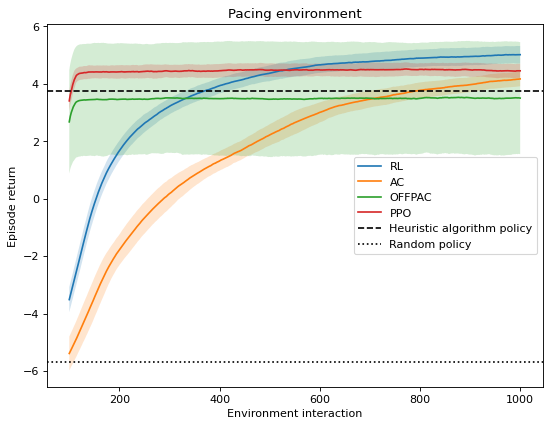

In [6]:
plot_data(experiments)